In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import calendar
import pandas as pd

In [2]:
data = pd.read_csv('Project_4.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   departure_city       127 non-null    object 
 3   arrival_city         127 non-null    object 
 4   scheduled_departure  127 non-null    object 
 5   scheduled_arrival    127 non-null    object 
 6   seats_sold           118 non-null    float64
 7   economy_sold         118 non-null    float64
 8   business_sold        118 non-null    float64
 9   total_seats          127 non-null    int64  
 10  economy_value        118 non-null    float64
 11  total_value          118 non-null    float64
 12  model                127 non-null    object 
 13  flight_minutes       127 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 14.0+ KB


In [4]:
data.sample(3)

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,economy_value,total_value,model,flight_minutes
30,136293,PG0252,Anapa,Moscow,2017-01-23T10:05:00Z,2017-01-23T11:45:00Z,114.0,102.0,12.0,130,1250400.0,1689600.0,Boeing 737-300,99.0
124,136540,PG0194,Anapa,Novokuznetsk,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,NaN,NaN,NaN,130,NaN,NaN,Boeing 737-300,307.0
0,136119,PG0252,Anapa,Moscow,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,113.0,102.0,11.0,130,1250400.0,1653000.0,Boeing 737-300,101.0


In [5]:
# В давафрейме есть пропущенные значения, заменим их на 0
data.fillna(0, inplace=True)

In [6]:
# Все рейсы без данных о доходах - из Анапы в Новокузнецк
data[data['total_value'] == 0]

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,economy_value,total_value,model,flight_minutes
118,136523,PG0194,Anapa,Novokuznetsk,2017-01-10T06:10:00Z,2017-01-10T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,312.0
119,136513,PG0194,Anapa,Novokuznetsk,2017-02-28T06:10:00Z,2017-02-28T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,310.0
120,136514,PG0194,Anapa,Novokuznetsk,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,299.0
121,136560,PG0194,Anapa,Novokuznetsk,2017-01-24T06:10:00Z,2017-01-24T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,305.0
122,136544,PG0194,Anapa,Novokuznetsk,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,304.0
123,136511,PG0194,Anapa,Novokuznetsk,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,310.0
124,136540,PG0194,Anapa,Novokuznetsk,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,307.0
125,136546,PG0194,Anapa,Novokuznetsk,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,302.0
126,136567,PG0194,Anapa,Novokuznetsk,2017-02-14T06:10:00Z,2017-02-14T11:15:00Z,0.0,0.0,0.0,130,0.0,0.0,Boeing 737-300,311.0


In [7]:
# Удалим их
data = data[data['arrival_city'] != 'Novokuznetsk']

In [8]:
data.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   flight_no            118 non-null    object 
 2   departure_city       118 non-null    object 
 3   arrival_city         118 non-null    object 
 4   scheduled_departure  118 non-null    object 
 5   scheduled_arrival    118 non-null    object 
 6   seats_sold           118 non-null    float64
 7   economy_sold         118 non-null    float64
 8   business_sold        118 non-null    float64
 9   total_seats          118 non-null    int64  
 10  economy_value        118 non-null    float64
 11  total_value          118 non-null    float64
 12  model                118 non-null    object 
 13  flight_minutes       118 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 13.8+ KB


In [9]:
# Переводим в формат Datetime дату и время прибытия и отправления
data['scheduled_departure'] = data['scheduled_departure'].apply(
                   lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
data['scheduled_arrival'] = data['scheduled_arrival'].apply(
                   lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [10]:
# День недели отправки рейса
data['departure_day'] = data['scheduled_departure'].dt.weekday
# Время вылета
data['departure_time'] = data['scheduled_departure'].apply(lambda x: x.time())
# Дата вылета
data['departure_date'] = data['scheduled_departure'].apply(lambda x: x.date())
# Месяц вылета
data['departure_month'] = data['scheduled_departure'].dt.month

Посмотрим, какие модели самолетов летают на рейсах из Анапы, сколько было рейсов, какая средняя длительность рейса и среднее количество мест в самолете

In [11]:
data.groupby(['flight_no', 'model', 'arrival_city', 'departure_time']).agg(
{'flight_id': ['count'], 'flight_minutes': ['mean'], 'total_seats': ['mean']})

,,,,flight_id,flight_minutes,total_seats
,,,,count,mean,mean
flight_no,model,arrival_city,departure_time,,,
PG0252,Boeing 737-300,Moscow,10:05:00,59,99.830508,130
PG0480,Sukhoi Superjet-100,Belgorod,09:25:00,59,50.084746,97


Из Анапы в Москву летает только Boeing 737-300, а в Белгород - только Sukhoi Superjet-100. Время отправления из Анапы в Москву всегда 10:05:00, а в Белгород - всегда 09:25:00. Количество рейсов из Анапы в Москву и из Анапы в Белгород - по 59. Среднее время полета из Анапы в Москву 99.830508	минут, из Анапы в Белгород 50.084746 минут.

In [12]:
data.sample(2)

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,economy_value,total_value,model,flight_minutes,departure_day,departure_time,departure_date,departure_month
9,136164,PG0252,Anapa,Moscow,2017-01-07 10:05:00,2017-01-07 11:45:00,120.0,109.0,11.0,130,1335800.0,1738400.0,Boeing 737-300,99.0,5,10:05:00,2017-01-07,1
98,136838,PG0480,Anapa,Belgorod,2017-01-24 09:25:00,2017-01-24 10:15:00,86.0,76.0,10.0,97,481200.0,670200.0,Sukhoi Superjet-100,51.0,1,09:25:00,2017-01-24,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_id            118 non-null    int64         
 1   flight_no            118 non-null    object        
 2   departure_city       118 non-null    object        
 3   arrival_city         118 non-null    object        
 4   scheduled_departure  118 non-null    datetime64[ns]
 5   scheduled_arrival    118 non-null    datetime64[ns]
 6   seats_sold           118 non-null    float64       
 7   economy_sold         118 non-null    float64       
 8   business_sold        118 non-null    float64       
 9   total_seats          118 non-null    int64         
 10  economy_value        118 non-null    float64       
 11  total_value          118 non-null    float64       
 12  model                118 non-null    object        
 13  flight_minutes       118 non-null  

### Оценка прибыльности на основе дохода - расхода на топливо

In [14]:
# Добавим расход топлива в т/ч для каждой модели
fuel_cons = {'Boeing 737-300': 2.4,
             'Sukhoi Superjet-100': 1.7}

In [15]:
# Признак расхода топлива для каждого рейса, исходя из длительности полета
data['used_fuel'] = data.apply(
    lambda row: fuel_cons[row['model']] / 60 * row['flight_minutes'], axis=1)

In [16]:
# Добавим цены на топливо для зимних месяцев 2017 (https://favt.gov.ru/)
fuel_prices = {1: 41435,
               2: 39553,
               12: 47101}

In [17]:
# Теперь можем посчитать расходы на топливо по каждому рейсу
data['fuel_cost'] = data.apply(lambda row: round(
    fuel_prices[row['departure_month']] * row['used_fuel'], 2), axis=1)

In [18]:
# Считаем прибыль, как разницу между выручкой по билетам и расходом на топливо
data['revenue'] = data['total_value'] - data['fuel_cost']

In [19]:
data.sample(2)

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,...,total_value,model,flight_minutes,departure_day,departure_time,departure_date,departure_month,used_fuel,fuel_cost,revenue
70,136649,PG0480,Anapa,Belgorod,2017-01-18 09:25:00,2017-01-18 10:15:00,96.0,84.0,12.0,97,...,759000.0,Sukhoi Superjet-100,50.0,2,09:25:00,2017-01-18,1,1.416667,58699.58,700300.42
68,136642,PG0480,Anapa,Belgorod,2017-01-30 09:25:00,2017-01-30 10:15:00,64.0,54.0,10.0,97,...,531000.0,Sukhoi Superjet-100,49.0,0,09:25:00,2017-01-30,1,1.388333,57525.59,473474.41


Посмотрим на распределения: рейсы из Анапы в Москву более дорогостоящие в плане расхода на топливо. Это не удивительно, т.к. расход топлива у Boeing 737-300 выше, чем у Sukhoi Superjet-100 и длительность полета из Анапы в Москву больше, чем из Анапы в Белгород.

<AxesSubplot:xlabel='fuel_cost', ylabel='Count'>

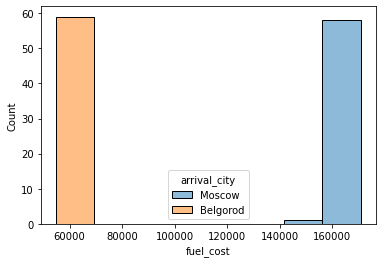

In [20]:
sns.histplot(data=data, x=data['fuel_cost'], hue=data['arrival_city'])

Также рейсы в Москву, в общем, имеют большую выручку (как результат более высокой цены за билет и/или большей заполненности самолета). На графике видны некоторые рейсы по каждому направлению, где выручка, ниже чем у остальных.

<AxesSubplot:xlabel='total_value', ylabel='Count'>

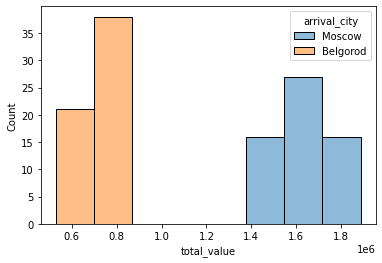

In [21]:
sns.histplot(data=data, x=data['total_value'], hue=data['arrival_city'])

Исходя из вышеописанного, ожидаемо, что и средяя прибыльность направления Анапа-Москва выше, чем Анапа-Белгород.

<function matplotlib.pyplot.show(close=None, block=None)>

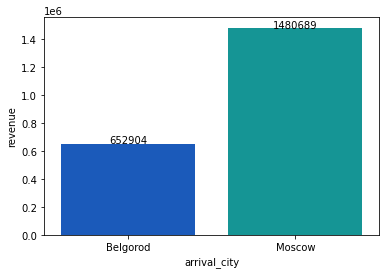

In [22]:
table = data.groupby('arrival_city').revenue.mean().reset_index()
gr = sns.barplot(x='arrival_city', y='revenue', data=table, palette='winter')


for index, row in table.iterrows():
    gr.text(row.name, row.revenue, round(
        row.revenue), color='black', ha="center")
plt.show

In [23]:
# Таблица со средними значениями прибыльности по каждому направлению
means = data.groupby('arrival_city').revenue.mean()


def prof_check(row):
    # Функция для определения прибыльности ниже среднего по каждому рейсу
    if row['revenue'] < means[row['arrival_city']]:
        return 'below_average'
    else:
        return 'ok'


# Создадим новый параметр на основе функции
data['profit_type'] = data.apply(lambda x: prof_check(x), axis=1)

In [24]:
# Параметр заполняемости рейса
data['seat_coverage'] = data['seats_sold']/data['total_seats']

Сравним заполненность рейсов с прибылью ниже среднего и с прибылью выше среднего для каждого из направлений.

Очевидно, что в случае обоих направлений, рейсы с прибылью ниже среднего имеют более низкую заполненность по сравнению с теми, у которых прибыльность в норме.

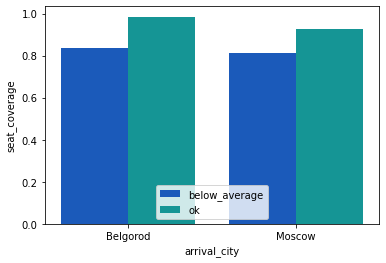

In [25]:
sc = data.groupby(['arrival_city', 'profit_type']
                  ).seat_coverage.mean().reset_index()
g = sns.barplot(x='arrival_city', y='seat_coverage',
                data=sc, hue='profit_type', palette='winter')
plt.legend(loc='lower center')

Проверим есть ли зависимость доходности от цены билета по рейсам в Белгород и Москву. Для этого посчитаем средние значения цены по классу Эконом (так как они составляют 90% мест).

Видим, что цена здесь не является фактором:

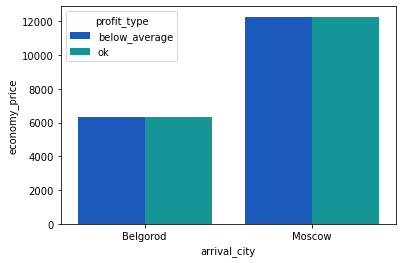

In [26]:
data['economy_price'] = data['economy_value'] / (data['economy_sold'])

prices_e = data.groupby(['arrival_city', 'profit_type'])[
    'economy_price'].mean().reset_index()
g = sns.barplot(x='arrival_city', y='economy_price',
                data=prices_e, hue='profit_type', palette='winter')

Посмотрим на зависимость заполняемости от дня недели: для рейсов Анапа-Москва заметный спад в воскресенье, в то время как самая высокая заполняемость рейсов Анапа-Белгород наблюдается в среду.

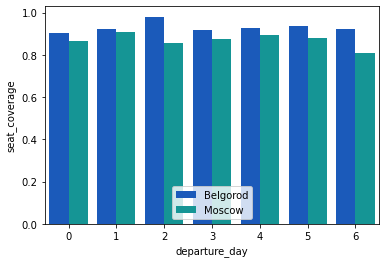

In [27]:
day_seats = data.groupby(['arrival_city', 'departure_day']
                         ).seat_coverage.mean().reset_index()
sns.barplot(x='departure_day', y='seat_coverage',
            data=day_seats, hue='arrival_city', palette='winter')
plt.legend(loc='lower center')

Посмотрим на заполненность рейсов с прибыльностью ниже среднего по дате.

Для рейса Анапа-Белгород сильно выбиваются низкие значения заполненности (<70%) в дни 2017-01-30 и 2017-02-23. Примечательно то, что во время новогодних праздников, заполненность рейсов не значительно ниже.

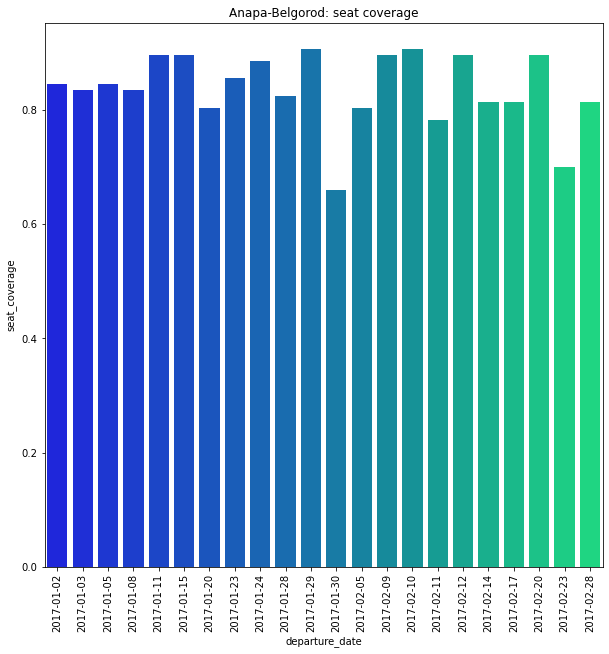

In [28]:
dates_t = data[data['profit_type'] == 'below_average'][['arrival_city',
    'departure_date', 'seat_coverage']].sort_values(by=['arrival_city',
    'departure_date'])
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='departure_date', y='seat_coverage', ax=ax,
        data=dates_t[dates_t['arrival_city'] == 'Belgorod'], palette='winter')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Anapa-Belgorod: seat coverage')
plt.show()

В отличие от рейса Анапа-Белгород, данные по Анапа-Москва более равномерны без очевидных выбросов.

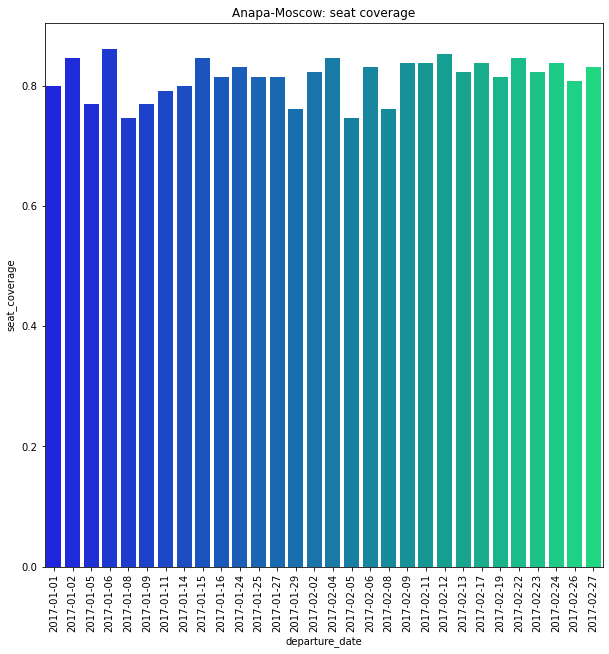

In [29]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g1 = sns.barplot(x='departure_date', y='seat_coverage', ax=ax,
          data=dates_t[dates_t['arrival_city'] == 'Moscow'], palette='winter')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
g1.set_title('Anapa-Moscow: seat coverage')
plt.show()

Воспользуемся формулой межквартильного расстояния для определения выбросов исходя из прибыльности рейсов по двум направлениям. Диапазон нижнего квартиля увеличим до 0.30, иначе не будет результатов.

In [30]:
def low_limit(dataset, city, column):
    q = np.quantile(dataset[dataset['arrival_city']
                            == city][column], [0.30, 0.75])
    IQR = q[1] - q[0]
    return q[0] - 1.5*IQR


# Рейсы на Белгород, прибыльность которых ниже определенного по формуле
data[(data['arrival_city'] == 'Belgorod') & (
    data['revenue'] < low_limit(data, 'Belgorod', 'revenue'))]

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,...,departure_day,departure_time,departure_date,departure_month,used_fuel,fuel_cost,revenue,profit_type,seat_coverage,economy_price
68,136642,PG0480,Anapa,Belgorod,2017-01-30 09:25:00,2017-01-30 10:15:00,64.0,54.0,10.0,97,...,0,09:25:00,2017-01-30,1,1.388333,57525.59,473474.41,below_average,0.659794,6333.333333
93,136807,PG0480,Anapa,Belgorod,2017-02-23 09:25:00,2017-02-23 10:15:00,68.0,60.0,8.0,97,...,3,09:25:00,2017-02-23,2,1.416667,56033.42,474966.58,below_average,0.701031,6330.000000
100,136844,PG0480,Anapa,Belgorod,2017-02-28 09:25:00,2017-02-28 10:15:00,79.0,73.0,6.0,97,...,1,09:25:00,2017-02-28,2,1.416667,56033.42,519066.58,below_average,0.814433,6324.657534


In [31]:
# Выбросов с точки зрения прибыльности среди рейсов на Москву нет
data[(data['arrival_city'] == 'Moscow') & (
    data['revenue'] < low_limit(data, 'Moscow', 'revenue'))]

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,...,departure_day,departure_time,departure_date,departure_month,used_fuel,fuel_cost,revenue,profit_type,seat_coverage,economy_price


Следующие 3 перелета в Белгород были определены как самые низкоприбыльные и могут быть отменены в будущем:

In [32]:
ids_to_cancel = [136642, 136807, 136844]

data.loc[data.apply(lambda x: x['flight_id'] in ids_to_cancel, axis=1)]

,flight_id,flight_no,departure_city,arrival_city,scheduled_departure,scheduled_arrival,seats_sold,economy_sold,business_sold,total_seats,...,departure_day,departure_time,departure_date,departure_month,used_fuel,fuel_cost,revenue,profit_type,seat_coverage,economy_price
68,136642,PG0480,Anapa,Belgorod,2017-01-30 09:25:00,2017-01-30 10:15:00,64.0,54.0,10.0,97,...,0,09:25:00,2017-01-30,1,1.388333,57525.59,473474.41,below_average,0.659794,6333.333333
93,136807,PG0480,Anapa,Belgorod,2017-02-23 09:25:00,2017-02-23 10:15:00,68.0,60.0,8.0,97,...,3,09:25:00,2017-02-23,2,1.416667,56033.42,474966.58,below_average,0.701031,6330.000000
100,136844,PG0480,Anapa,Belgorod,2017-02-28 09:25:00,2017-02-28 10:15:00,79.0,73.0,6.0,97,...,1,09:25:00,2017-02-28,2,1.416667,56033.42,519066.58,below_average,0.814433,6324.657534
